In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [44]:
# Load the dataset
file_path = "car_evaluation.csv" 
df = pd.read_csv(file_path)

# Shuffle the dataset with random seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,buying,maintenance,doors,persons,lug_boot,safety,label
0,3,3,4,2,2,3,0
1,2,1,2,4,2,2,1
2,3,3,5,2,3,2,0
3,1,3,5,4,2,2,1
4,2,1,4,5,2,1,0


In [45]:
# Convert categorical features into numerical values using Label Encoding
encoder = LabelEncoder()
X = df.drop(columns=['label']).apply(encoder.fit_transform)
y = df['label']

X.head()


,buying,maintenance,doors,persons,lug_boot,safety
0,2,2,2,0,1,2
1,1,0,0,1,1,1
2,2,2,3,0,2,1
3,0,2,3,1,1,1
4,1,0,2,2,1,0


In [46]:
# Split into Train (60%), Validation (20%), and Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shape of each split
X_train.shape, X_val.shape, X_test.shape


((1036, 6), (346, 6), (346, 6))

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [48]:
# Train an SVM classifier with C=1.0
svm_model = SVC(C=1.0, kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [49]:
# Get predictions
y_train_pred = svm_model.predict(X_train_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9788
Validation Accuracy: 0.9566
Test Accuracy: 0.9480


In [50]:
#b.
import numpy as np

# Define the range of C values: {10^-3, 10^-2, ..., 10^2, 10^3}
C_values = np.logspace(-3, 3, num=7)
C_values


array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [51]:


# Lists to store accuracy results
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train SVM with different values of C
for C in C_values:
    svm_model = SVC(C=C, kernel='rbf', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Get predictions
    y_train_pred = svm_model.predict(X_train_scaled)
    y_val_pred = svm_model.predict(X_val_scaled)
    y_test_pred = svm_model.predict(X_test_scaled)

    # Compute accuracy
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    val_accuracies.append(accuracy_score(y_val, y_val_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Print accuracy results for each C value
for i, C in enumerate(C_values):
    print(f"C={C:.4f} | Train Acc: {train_accuracies[i]:.4f} | Val Acc: {val_accuracies[i]:.4f} | Test Acc: {test_accuracies[i]:.4f}")


C=0.0010 | Train Acc: 0.7114 | Val Acc: 0.6850 | Test Acc: 0.6821
C=0.0100 | Train Acc: 0.7114 | Val Acc: 0.6850 | Test Acc: 0.6821
C=0.1000 | Train Acc: 0.8600 | Val Acc: 0.8613 | Test Acc: 0.8295
C=1.0000 | Train Acc: 0.9788 | Val Acc: 0.9566 | Test Acc: 0.9480
C=10.0000 | Train Acc: 0.9952 | Val Acc: 0.9798 | Test Acc: 0.9855
C=100.0000 | Train Acc: 0.9990 | Val Acc: 0.9769 | Test Acc: 0.9711
C=1000.0000 | Train Acc: 1.0000 | Val Acc: 0.9827 | Test Acc: 0.9769


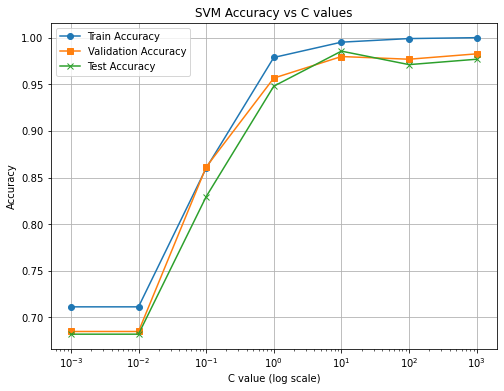

In [52]:
import matplotlib.pyplot as plt

# Plot accuracy for different C values
plt.figure(figsize=(8, 6))
plt.plot(C_values, train_accuracies, label="Train Accuracy", marker="o")
plt.plot(C_values, val_accuracies, label="Validation Accuracy", marker="s")
plt.plot(C_values, test_accuracies, label="Test Accuracy", marker="x")

# Log scale for x-axis (C values)
plt.xscale("log")
plt.xlabel("C value (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs C values")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# Find the best C value based on validation accuracy
best_C_index = np.argmax(val_accuracies)
best_C = C_values[best_C_index]

print(f"The best generalization performance is achieved at C={best_C:.4f}, "
      f"with Validation Accuracy: {val_accuracies[best_C_index]:.4f} and Test Accuracy: {test_accuracies[best_C_index]:.4f}.")


The best generalization performance is achieved at C=1000.0000, with Validation Accuracy: 0.9827 and Test Accuracy: 0.9769.


In [54]:
#2 QUESTION 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
# Load the dataset
file_path = "wine.csv"  # Ensure this file is in the same directory
df = pd.read_csv(file_path)

# Shuffle the dataset with random seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [56]:
# Define features (X) and target (y)
X = df.drop(columns=['quality'])  # All columns except 'quality'
y = df['quality']  # Target variable

# Split into Training (70%) and Test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train.shape, X_test.shape


((1119, 11), (480, 11))

In [57]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [58]:
# Get predictions on the test set
y_pred = dt_model.predict(X_test)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from Confusion Matrix
tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (None, None, None, None)  # Handle multi-class cases
print("Confusion Matrix:\n", conf_matrix)

# Display extracted values if binary classification
if tn is not None:
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")


Confusion Matrix:
 [[  1   1   0   2   0   0]
 [  0   3   5   8   0   0]
 [  0   8 128  57   7   0]
 [  0   0  48 123  17   3]
 [  0   0   7  21  34   3]
 [  0   0   1   2   1   0]]


In [59]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.25      0.40         4
           4       0.25      0.19      0.21        16
           5       0.68      0.64      0.66       200
           6       0.58      0.64      0.61       191
           7       0.58      0.52      0.55        65
           8       0.00      0.00      0.00         4

    accuracy                           0.60       480
   macro avg       0.51      0.37      0.40       480
weighted avg       0.61      0.60      0.60       480



In [60]:
#B 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Get predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Compute Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Extract TP, FP, TN, FN from Confusion Matrix (if binary classification)
tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf.ravel() if conf_matrix_rf.size == 4 else (None, None, None, None)

print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

# Display extracted values if binary classification
if tn_rf is not None:
    print(f"True Positives (TP): {tp_rf}")
    print(f"False Positives (FP): {fp_rf}")
    print(f"True Negatives (TN): {tn_rf}")
    print(f"False Negatives (FN): {fn_rf}")


Confusion Matrix (Random Forest):
 [[  0   0   4   0   0   0]
 [  0   1  12   3   0   0]
 [  0   0 155  44   1   0]
 [  0   0  47 136   8   0]
 [  0   0   2  29  33   1]
 [  0   0   0   2   2   0]]


In [63]:
# Generate classification report with zero_division handling to prevent warnings
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print("Classification Report (Random Forest):\n", report_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       1.00      0.06      0.12        16
           5       0.70      0.78      0.74       200
           6       0.64      0.71      0.67       191
           7       0.75      0.51      0.61        65
           8       0.00      0.00      0.00         4

    accuracy                           0.68       480
   macro avg       0.68      0.34      0.36       480
weighted avg       0.69      0.68      0.66       480

